In [56]:
import os
os.listdir()

['Divorce Rates.xlsx',
 'MarDiv.ipynb',
 'marriage.csv',
 'Marriage_Divorce_DB.csv',
 'Marriage_Divorce_DB.xlsx',
 'MATRIMONY.NS_stock_data.csv',
 'sample_submission.csv',
 'Stocks']

In [57]:
for i in list(os.listdir()):
    if str(i).endswith(".csv"):
        print(i)

marriage.csv
Marriage_Divorce_DB.csv
MATRIMONY.NS_stock_data.csv
sample_submission.csv


In [58]:
import pandas as pd
data=pd.read_csv("marriage.csv").drop(columns="height")
data

,id,gender,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
...,...,...,...,...,...,...,...,...,...
2562,2563,female,Hindu,Thakur,Hindi,Banking Professional,Agra,India,27.0
2563,2564,male,Hindu,Thakur,Hindi,Software Professional,Ottawa,Canada,31.0
2564,2565,female,Hindu,Baishya,Bengali,Software Consultant,Bengaluru / Bangalore,India,28.0
2565,2566,female,NaN,others,Telugu,Not working,Hyderabad,India,26.0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2567 non-null   int64  
 1   gender           2538 non-null   object 
 2   religion         1932 non-null   object 
 3   caste            2425 non-null   object 
 4   mother_tongue    2403 non-null   object 
 5   profession       2237 non-null   object 
 6   location         2412 non-null   object 
 7   country          2551 non-null   object 
 8   age_of_marriage  2548 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 180.6+ KB


In [60]:
"""for i in range(len(data["height"])):
    data["height"][i]
    print(data["height"][i])
#data["height"]
    #print(float(i.split("'")[0])+(0.1*float((i.split("'")[1].split("\"")[0]))))"""

'for i in range(len(data["height"])):\n    data["height"][i]\n    print(data["height"][i])\n#data["height"]\n    #print(float(i.split("\'")[0])+(0.1*float((i.split("\'")[1].split(""")[0]))))'

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def f(i):
    data[i]=le.fit_transform(data[i])
for i in data.columns:
    f(i)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2567 non-null   int64
 1   gender           2567 non-null   int32
 2   religion         2567 non-null   int32
 3   caste            2567 non-null   int32
 4   mother_tongue    2567 non-null   int32
 5   profession       2567 non-null   int32
 6   location         2567 non-null   int32
 7   country          2567 non-null   int32
 8   age_of_marriage  2567 non-null   int64
dtypes: int32(7), int64(2)
memory usage: 110.4 KB


In [62]:
data

,id,gender,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,0,0,5,41,24,86,302,28,1
1,1,1,2,34,6,22,167,26,12
2,2,1,1,14,8,25,60,8,12
3,3,0,1,36,8,7,339,8,10
4,4,1,0,13,13,70,470,8,10
...,...,...,...,...,...,...,...,...,...
2562,2562,0,1,36,8,9,5,8,7
2563,2563,1,1,36,8,74,373,4,11
2564,2564,0,1,7,2,73,65,8,8
2565,2565,0,5,41,24,58,226,8,6


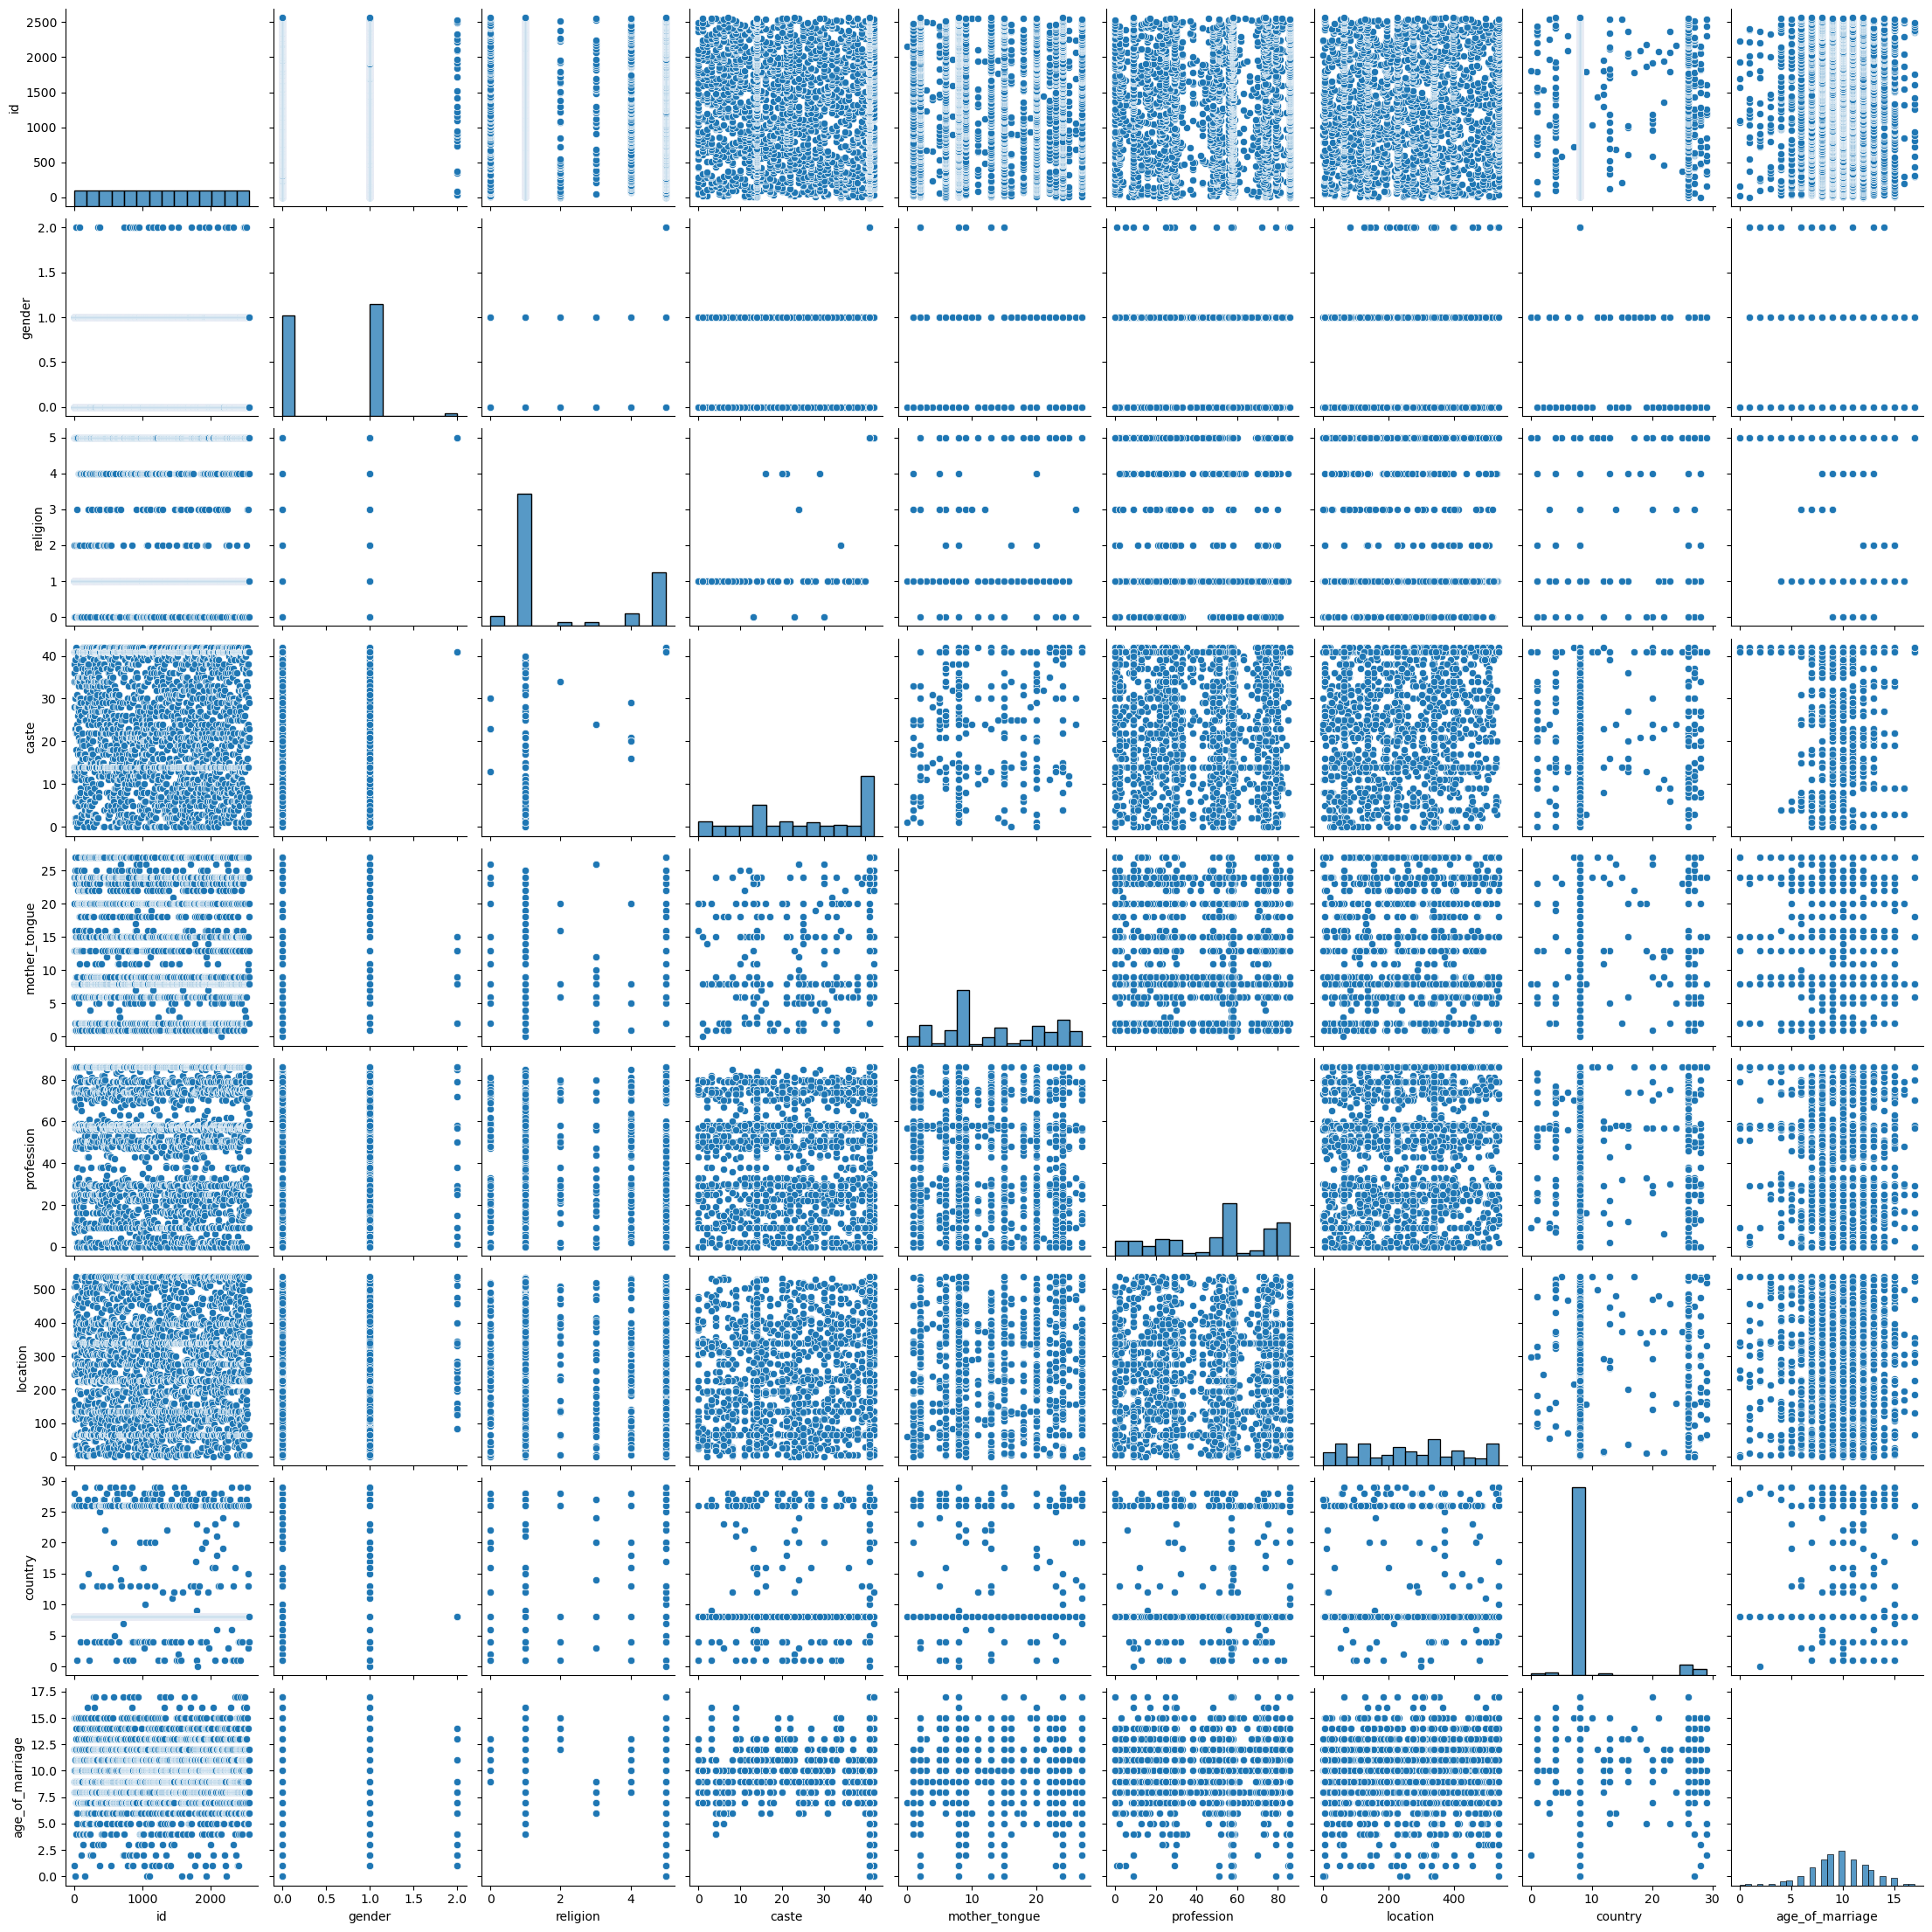

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()

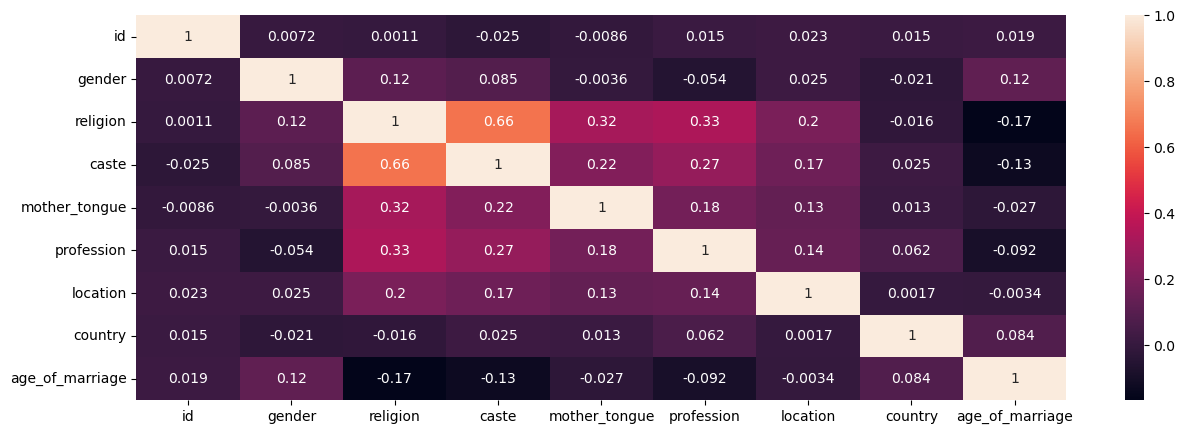

In [64]:
plt.figure(figsize=[15,5])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [65]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [67]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [68]:
y_pred=model.predict(x_test)
y_pred

array([ 9.14446719, 10.40589676,  9.29472142,  8.45100355,  8.37808398,
        8.50688118, 10.3033377 , 10.39952321, 10.7549421 ,  9.03460539,
        9.54756835, 10.06026834,  9.03832729,  9.28834704,  9.26956411,
        8.91828428,  9.91747029,  8.03349118,  9.53023111,  9.63934383,
       10.17662566, 10.25876151,  8.99675753,  8.04027876,  9.31495938,
        9.15361865, 10.35999467, 10.56373899,  9.46250843,  9.8737286 ,
        9.75937898, 10.30940539,  8.72895813, 10.2721903 ,  9.19788545,
        8.96992899, 10.27248472,  9.35807788, 10.28978128, 10.18212204,
        8.18398477,  9.50326895, 10.09625298,  9.41012688, 10.35923569,
       10.20417152,  9.25455309,  9.10220242,  8.64422406, 10.47100204,
       10.19289774,  9.55287005,  9.44582436, 10.58682806, 10.31215992,
        8.91627319,  8.66745682,  8.36295254,  8.32111906,  8.72874515,
        8.18987327, 10.26102795, 10.78299929,  9.28600739,  9.49830383,
       10.58855236,  7.91039193,  9.59787957,  9.47914095, 10.65

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))


2.2459067728606352
8.366574743484442
2.8925031967976182
